<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependenices" data-toc-modified-id="Dependenices-1">Dependenices</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-5">Heatmap</a></span></li><li><span><a href="#Deprecated" data-toc-modified-id="Deprecated-6">Deprecated</a></span></li><li><span><a href="#Enrichment-analysis-with-MSigDB" data-toc-modified-id="Enrichment-analysis-with-MSigDB-7">Enrichment analysis with MSigDB</a></span></li><li><span><a href="#Using-ReactomePA" data-toc-modified-id="Using-ReactomePA-8">Using ReactomePA</a></span></li></ul></div>

# Dependenices

In [1]:
#library(ggplot2)
library(ComplexHeatmap)
library(circlize)
#library(clusterProfiler)
library(org.Hs.eg.db)

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Loading required package: AnnotationDbi

Loading required packa

# Functions

In [2]:
source("~/OneDrive - UHN//R_src/ggplot2_theme.R")

In [3]:
class_hm.fx <- function(class_vector_ordered){

    colors = structure(c("#d7191c", "#fdae61", "#abd9e9", "#2c7bb6"),
                       names = c("C1", "C2", "C3", "C4"))    
    
    class_mat <- t(as.matrix(class_vector_ordered))
    rownames(class_mat) <- "Cluster"
    class_hm = Heatmap(class_mat,
                       #titles and names
                       name = "Immune cluster",
                       show_row_names = TRUE,
                       show_column_names = TRUE,    
                       #clusters
                       cluster_columns = FALSE,
                       cluster_rows = FALSE,
                       #aesthestics
                       col = colors,
                       column_names_gp = gpar(fontsize = 15),
                       height = unit(1, "cm"),
                       row_names_gp = gpar(fontsize = 20))
    return(class_hm)
}

In [4]:
gene_hm.fx <- function(genes_mat){

   # col_fun= colorRamp2(c(-1, 0, 1), c("blue", "white", "red"))
    
    gene_hm = Heatmap(genes_mat,
                       #titles and names   
                       name = "Gene expression z score",   
                       show_row_names = TRUE,
                       show_column_names = FALSE,     
                       #clusters and orders  
                       cluster_columns = TRUE,
                       cluster_rows = TRUE,
                       show_column_dend = TRUE,
                       show_row_dend = TRUE,                      
                       #row_dend_width = unit(8, "cm"),
                       #aesthestics
                 #      col = col_fun,
                       column_names_gp = gpar(fontsize = 20),
                       row_names_gp = gpar(fontsize = 20),
                       height = unit(nrow(genes_mat), "cm"),
                       column_title_gp = gpar(fontsize = 20),
                       column_title = NULL,
                       row_title = NULL)
    return(gene_hm)   
}

In [5]:
cohorts_hm.fx <- function(cohorts_mat){
 
colpal <- c("MB_PDX" = "#878787", #PDX
            "ETMR" = "#76afa9", #ped
            "MNG" = "#a6cee3", 
            "MB" =  "#1f78b4",
            "SCHW" =  "#678ba5",
            "ATRT" =  "#33a02c",
            "EPN" = "#e31a1c",
            "pedHGG" = "#fdbf6f",
            "pedLGG" = "#8763ae",
            "NFB" = "#cab2d6",
            "CPH" = "#cccc7a",
            "CP" = "#a9a9a9",
            
            "NBL" = "#b2df8a",
            
            "SKCM" = "#7c9c60", #Adult
            "LGG" = "#753a00",
            "GBM" = "#6a3d9a",
            "OV" = "#afaf78",
            "PRAD" = "#a85426",
            "LUAD" = "#ad3837",
            "COAD" = "#726579")

    cohort_hm = Heatmap(cohorts_mat,
                        #titles and names
                        name = "Cohort",
                        show_row_names = TRUE,
                        show_column_names = FALSE,    
                        #clusters
                        cluster_columns = FALSE,
                        cluster_rows = FALSE,
                        #aesthestics
                        col = colpal,
                        column_names_gp = gpar(fontsize = 15),
                        height = unit(1, "cm"),
                        row_names_gp = gpar(fontsize = 20))
    return(cohort_hm)   
}

# Paths

In [6]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [7]:
load(file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

# Heatmap

In [8]:
load(paste0(datapath,"exp_mat/tpm_matrix_ped_final.RData"))

In [9]:
dim(tpm_matrix_ped_final)

[1] 20105   925

In [10]:
immunoreg <- read.csv(file = paste0(datapath, "Geneset/Riaz_Immunoreg_geneset.csv"), 
                      header = T, stringsAsFactors = F, check.names = F)

In [11]:
reg_genes <- trimws(immunoreg$Gene)

In [12]:
reg_genes

[1] "TNFRSF9"  "IDO1"     "TDO2"     "FASLG"    "KLRC2"    "IL6"     
 [7] "CXCL8"    "IL23A"    "STAT3"    "FGF2"     "CXCL1"    "IL1RN"   
[13] "IL10"     "IL11"     "IL13"     "TGFB1"    "TGFB2"    "TGFB3"   
[19] "YAP1"     "CXCL5"    "PRKCI"    "PDCD1"    "CD274"    "CTLA4"   
[25] "CEACAM1"  "CD47"     "LAG3"     "TIGIT"    "PDCD1LG2" "CD276"   
[31] "IL4I1"    "VEGFA"    "VEGFC"    "VEGFD"    "FOXP3"    "ADORA2A" 
[37] "ARHGEF5"  "BTLA"     "CD160"    "CD244"    "CD27"     "CD80"    
[43] "GEM"      "HAVCR2"   "ICOS"     "TNFSF4"   "VTCN1"    "CSF2"    
[49] "LGALS3"   "CCL2"     "PTGES2"   "ARG1"     "PDGFC"    "TNFRSF4" 
[55] "SIRPA"    "HMGB1"    "MRC2"     "VSIR"     "ENTPD1"

In [13]:
mycluster <- as.character(metadata_IC$immune_cluster)
names(mycluster) <- rownames(metadata_IC)
cluster_hm <- class_hm.fx(mycluster)

In [14]:
mycohort <- metadata_IC$cohort
names(mycohort) <- metadata_IC$sample_id
mycohorts <- t(as.matrix(mycohort))
rownames(mycohorts) <- "Cohort"
cohorts_hm <- cohorts_hm.fx(mycohorts)

In [16]:
reg_genes[!reg_genes %in% rownames(tpm_matrix_ped_final)]

character(0)

In [17]:
reg_genes <- reg_genes[reg_genes %in% rownames(tpm_matrix_ped_final)]

In [18]:
mygen_mat <- tpm_matrix_ped_final[ reg_genes, metadata_IC$sample_id]
dim(mygen_mat)

[1]  59 925

In [19]:
mygen_mat_log <- log2(mygen_mat + 1)

In [21]:
head(mygen_mat_log)

,TARGET-30-PAIFXV-01A,TARGET-30-PAIPGU-01A,TARGET-30-PAISNS-01A,TARGET-30-PAITCI-01A,TARGET-30-PAIVHE-01A,TARGET-30-PAIXIF-01A,TARGET-30-PAKYZS-01A,TARGET-30-PAKZRH-01A,TARGET-30-PALBFW-01A,TARGET-30-PALCBW-01A,⋯,ICGC_PA89,ICGC_PA9,ICGC_PA91,ICGC_PA92,ICGC_PA93,ICGC_PA94,ICGC_PA95,ICGC_PA96,ICGC_PA97,ICGC_PA99
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TNFRSF9,1.2203300,1.4905701,0.22650853,0.43295941,0.7048720,0.5058909,3.16832112,0.07038933,0.7990873,0.9781956,⋯,0.13750352,0.27500705,0.04264434,0.02856915,0.16349873,0.0000000,0.07038933,0.27500705,0.33342373,0.07038933
IDO1,2.5509007,2.2357271,0.94860085,0.77399633,1.5655972,2.3868109,0.21412481,1.20163386,1.4698860,2.1699250,⋯,0.00000000,0.12432814,0.22650853,0.00000000,0.15055968,0.0000000,0.15055968,0.01435529,0.09761080,0.12432814
TDO2,1.1634987,3.7949357,0.61353165,2.28392177,2.6016965,1.7865964,1.74416110,1.32768736,1.2750070,1.1634987,⋯,0.22650853,0.15055968,0.04264434,0.55581616,0.18903382,0.0000000,0.71369581,0.07038933,0.15055968,1.12432814
FASLG,0.1375035,0.5849625,0.02856915,0.07038933,0.4541759,0.1505597,0.07038933,0.05658353,0.3448285,0.3448285,⋯,0.01435529,0.04264434,0.01435529,0.01435529,0.08406426,0.0000000,0.11103131,0.02856915,0.01435529,0.00000000
KLRC2,1.2078929,0.2387869,0.32192809,0.46466827,0.3448285,0.4114262,0.45417589,0.08406426,0.9927684,0.5945485,⋯,2.68929916,1.65535183,2.17312743,3.40053793,1.76553475,3.0635029,2.23878686,2.67807191,4.06781078,3.36737107
IL6,5.5604093,1.1309309,1.57531233,4.19770816,4.7527486,6.5248159,4.39574833,1.26303441,3.7886857,2.0942361,⋯,0.16349873,0.67807191,0.36737107,0.18903382,0.27500705,0.1375035,0.26303441,0.27500705,0.41142625,0.00000000


In [22]:
mygen_mat_z <- t(scale(t(mygen_mat_log)))

In [23]:
gene_hm <- gene_hm.fx(mygen_mat_z)

The automatically generated colors map from the minus and plus 99^th of
the absolute values in the matrix. There are outliers in the matrix
whose patterns might be hidden by this color mapping. You can manually
set the color to `col` argument.

Use `suppressMessages()` to turn off this message.



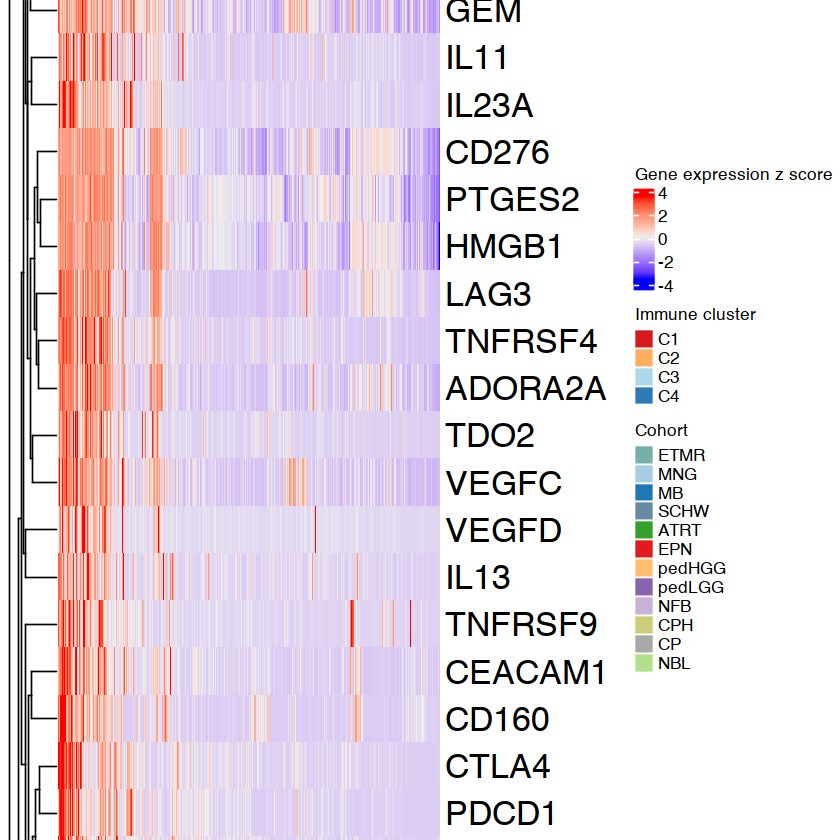

In [24]:
gene_hm %v% cluster_hm %v% cohorts_hm

In [25]:
pdf(paste0(plotpath, "heatmap_immunoregulatory_genes.pdf"),
   width = 20, height = 40)
gene_hm %v% cluster_hm %v% cohorts_hm
dev.off()

pdf 
  2

Get median of log2 gene expression for each immune cluster

In [27]:
median_mat <- matrix(nrow = 59, ncol = 4,
                    dimnames = list(rownames(mygen_mat_log), c("C1", "C2", "C3", "C4")))

In [28]:
for( g in rownames(mygen_mat_log)){
    median_mat[g,1] <- median(mygen_mat_z[g,metadata_IC$sample_id[metadata_IC$immune_cluster == "C1"]])
    median_mat[g,2] <- median(mygen_mat_z[g, metadata_IC$sample_id[metadata_IC$immune_cluster == "C2"]])    
    median_mat[g,3] <- median(mygen_mat_z[g, metadata_IC$sample_id[metadata_IC$immune_cluster == "C3"]])
    median_mat[g,4] <- median(mygen_mat_z[g, metadata_IC$sample_id[metadata_IC$immune_cluster == "C4"]])
}

In [34]:
   # col_fun= colorRamp2(c(-1, 0, 1), c("blue", "white", "red"))
    
    median_gene_hm = Heatmap(t(median_mat),
                       #titles and names   
                       name = "Median z score gene expression",   
                       show_row_names = TRUE,
                       show_column_names = TRUE,     
                       #clusters and orders  
                       cluster_columns = TRUE,
                       cluster_rows = TRUE,
                       show_column_dend = TRUE,
                       show_row_dend = TRUE,                      
                       #row_dend_width = unit(8, "cm"),
                       #aesthestics
                 #      col = col_fun,
                       column_names_gp = gpar(fontsize = 20),
                       row_names_gp = gpar(fontsize = 15),
                       width = unit(nrow(median_mat)/2, "cm"),
                       height = unit(ncol(median_mat), "cm"),
                       column_title_gp = gpar(fontsize = 20),
                       column_title = NULL,
                       row_title = NULL)

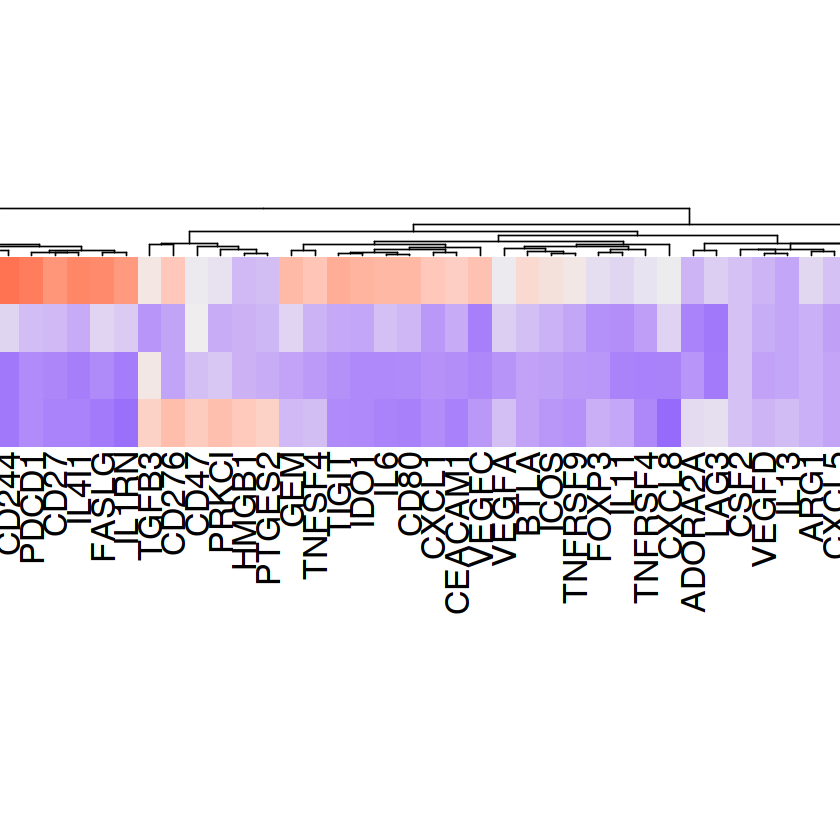

In [35]:
median_gene_hm

In [36]:
pdf(paste0(plotpath, "heatmap_median_immunoregulatory_genes_IC.pdf"),
   width = 20, height = 40)
median_gene_hm
dev.off()

pdf 
  2

# Deprecated

# Enrichment analysis with MSigDB

In [ ]:
library(fgsea)

In [ ]:
Hs.H <- read.table(paste0(datapath, "DEG/h.all.v7.1.symbols.gmt"), 
                   header = F, check.names = F, sep = "\t", fill = T, stringsAsFactors = F)

In [ ]:
rownames(Hs.H) <- Hs.H$V1
Hs.H$V1 <- NULL
Hs.H$V2 <- NULL

In [ ]:
Hs.H.list <- as.list(as.data.frame(t(Hs.H)))

In [ ]:
head(Hs.H.list)

In [ ]:
#shrunken_res_C4 <- shrunken_res_C4[order(shrunken_res_C4$log2FoldChange),]

In [ ]:
ranks <- shrunken_res_C1$log2FoldChange
names(ranks) <- rownames(shrunken_res_C1)
ranks <- ranks[!is.na(ranks)]
head(ranks)

In [ ]:
ranks <- sort(ranks, decreasing = T)

In [ ]:
barplot(ranks, decreasing = T)

In [ ]:
fgseaRes <- fgseaMultilevel(Hs.H.list, ranks, minSize=15, maxSize = 500, eps = 0)

In [ ]:
head(fgseaRes)

In [ ]:
ggplot(fgseaRes, aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.2)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + myplot

# Using ReactomePA

In [ ]:
library(clusterProfiler)

In [ ]:
options(scipen = 999)

In [ ]:
myentrez <-  clusterProfiler::bitr(rownames(shrunken_res_C1), 
                                   fromType="SYMBOL", toType="ENTREZID", OrgDb= "org.Hs.eg.db")

In [ ]:
shrunken_res_C1$Entrez <- myentrez$ENTREZID[match(rownames(shrunken_res_C1), myentrez$SYMBOL)]

In [ ]:
library(ReactomePA)

In [ ]:
myentrez <-  clusterProfiler::bitr(rownames(shrunken_res_C1), 
                                   fromType="SYMBOL", toType="ENTREZID", OrgDb= "org.Hs.eg.db")

In [ ]:
shrunken_res_C1$Entrez <- myentrez$ENTREZID[match(rownames(shrunken_res_C1), myentrez$SYMBOL)]

In [ ]:
mygenelist <- shrunken_res_C1$log2FoldChange
names(mygenelist) <- shrunken_res_C1$Entrez

In [ ]:
summary(mygenelist)

In [ ]:
de <- names(mygenelist)[abs(mygenelist) > 1.5]
head(de)

In [ ]:
x <- enrichPathway(gene=de, pvalueCutoff = 0.05, readable=TRUE)
head(x)

In [ ]:
library(enrichplot)
barplot(x, showCategory=20)

In [ ]:
pdf(paste0(plotpath, "Reactome_C1_barplot.pdf"),
   width = 20, height = 20)

barplot(x, showCategory=20)

dev.off()

In [ ]:
mygenelist <- mygenelist[order(mygenelist, decreasing = T)]

In [ ]:
y <- gsePathway(mygenelist, 
                pvalueCutoff = 0.05,
                pAdjustMethod = "BH", 
                verbose = FALSE)
head(y)

In [ ]:
y <- as.data.frame(y)

In [ ]:
myenrichplot <- ggplot(y, aes(reorder(Description, NES), NES)) +
  geom_col(aes(fill=p.adjust<0.01)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + myplot

In [ ]:
pdf(paste0(plotpath, "Reactome_C1_enrichplot.pdf"),
   width = 20, height = 40)

myenrichplot

dev.off()

In [ ]:
pdf(paste0(plotpath, "Reactome_C1_dotplot.pdf"),
   width = 20, height = 20)

dotplot(y, showCategory=20)
dotplot(x, showCategory=20)

dev.off()

In [ ]:
edox <- setReadable(x, 'org.Hs.eg.db', 'ENTREZID')
p1 <- cnetplot(edox, foldChange= mygenelist)
## categorySize can be scaled by 'pvalue' or 'geneNum'
p2 <- cnetplot(edox, categorySize="pvalue", foldChange=mygenelist)


In [ ]:
pdf(paste0(plotpath, "Reactome_C1_cnet.pdf"),
   width = 20, height = 20)

p2

dev.off()

In [ ]:
edo <- pairwise_termsim(x)

In [ ]:

p1 <- emapplot(edo)
p2 <- emapplot(edo, cex_category=1.5)
p3 <- emapplot(edo, layout="kk")
p4 <- emapplot(edo, cex_category=1.5,layout="kk") 

In [ ]:
pdf(paste0(plotpath, "Reactome_C1_emap.pdf"),
   width = 20, height = 20)
p1
p2
p3
p4
dev.off()